![](https://img.kaikeba.com/web/kkb_index/img_index_logo.png)

# 人工智能基础课机器学习 第三节课作业 线性回归

同学们大家好，本次作业是考察学生对线性回归的理解与SKLearn的使用，以及pandas的使用。

本次作业的数据集：data.csv
这份数据代表了一个循环发电厂，每个数据有5列，分别是:AT（温度）, V（压力）, AP（湿度）, RH（压强）, PE（输出电力)

问题是得到一个线性的关系，对应PE是样本输出，而AT/V/AP/RH这4个是样本特征， 机器学习的目的就是得到一个线性回归模型，即: PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH 而需要学习的，就是W0,W1,W2,W3,W4这5个参数。


In [2]:
import pandas as pd
from sklearn import linear_model,metrics
import numpy as np

# 第一步：读取样本数据，并将数据集分为训练集和测试集




In [3]:
df= pd.read_csv('./data.csv')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


In [4]:
X=df.loc[:,'AT':'RH']
Y=df.loc[:,'PE']
X=np.array(X)
Y=np.array(Y).reshape((len(df),1))
X_train=np.array(X)[:-1500]
print('训练集X','\n',X_train,'\n',X_train.shape)
Y_train=np.array(Y)[:-1500]
print('训练集Y','\n',Y_train,'\n',Y_train.shape)

训练集X 
 [[   8.34   40.77 1010.84   90.01]
 [  23.64   58.49 1011.4    74.2 ]
 [  29.74   56.9  1007.15   41.91]
 ...
 [  25.73   62.66 1010.15   54.66]
 [  25.21   64.63 1020.56   51.31]
 [  18.93   48.6  1005.72   84.92]] 
 (8068, 4)
训练集Y 
 [[480.48]
 [445.75]
 [438.76]
 ...
 [444.85]
 [448.66]
 [449.74]] 
 (8068, 1)


In [5]:
X_test=np.array(X)[-1500:]
print('测试集X','\n',X_test,'\n',X_test.shape)
Y_test=np.array(Y)[-1500:]
print('测试集Y','\n',Y_test,'\n',Y_test.shape)

测试集X 
 [[  28.84   75.6  1018.41   53.96]
 [  32.43   68.31 1010.09   42.22]
 [  25.77   58.59 1012.51   55.84]
 ...
 [  15.99   43.34 1014.2    78.66]
 [  17.65   59.87 1018.58   94.65]
 [  23.68   51.3  1011.86   71.24]] 
 (1500, 4)
测试集Y 
 [[442.69]
 [439.75]
 [449.65]
 ...
 [465.96]
 [450.93]
 [451.67]] 
 (1500, 1)


#  第二步：训练Linear Regreesion模型，得到训练参数

In [6]:
regr=linear_model.LinearRegression()
regr.fit(X_train,Y_train)
coef=regr.coef_
intercept=regr.intercept_
print('参数W1,W2,W3,W4：',coef)
print('参数W0：',intercept)
#PE=W0+W1∗AT+W2∗V+W3∗AP+W4∗RH
print('Model:','PE=({W0})+({W1})*AT+({W2})*V+({W3})*AP+({W4})*RH'.format(W0='%.2f'%intercept[0],W1='%.2f'%coef[0][0],W2='%.2f'%coef[0][1],W3='%.2f'%coef[0][2],W4='%.2f'%coef[0][3]))

参数W1,W2,W3,W4： [[-1.96879008 -0.23569541  0.06419842 -0.15706691]]
参数W0： [452.29363787]
Model: PE=(452.29)+(-1.97)*AT+(-0.24)*V+(0.06)*AP+(-0.16)*RH


# 第三步：使用均方误差和均方根误差在测试集上的表现来评价模型的好坏。



In [9]:
Y_test_predict=regr.predict(X_test)
print('模型预测值Y\n',Y_test_predict,'\n',Y_test_predict.shape)
mse=metrics.mean_squared_error(Y_test,Y_test_predict)
print('均方误差（没有多个模型对比的情况下，这个指标不能确定模型训练的效果）：',mse)
print('均方根误差（没有多个模型对比的情况下，这个指标不能确定模型训练的效果）：',np.sqrt(mse))
#print(regr.score(X_test,Y_test))
r2_score=metrics.r2_score(Y_test,Y_test_predict)
#r2_score越接近1，模型越好
print('R平方值（越接近1，模型越好）：',r2_score)

模型预测值Y
 [[434.60014014]
 [430.56023792]
 [443.97944812]
 ...
 [463.35279858]
 [453.95825121]
 [447.35187958]] 
 (1500, 1)
均方误差（没有多个模型对比的情况下，这个指标不能确定模型训练的效果）： 20.140986320888178
均方根误差（没有多个模型对比的情况下，这个指标不能确定模型训练的效果）： 4.48787102320111
R平方值（越接近1，模型越好）： 0.9330351946511213


# 第四步：可视化的方式直观的表示模型学习效果的好坏



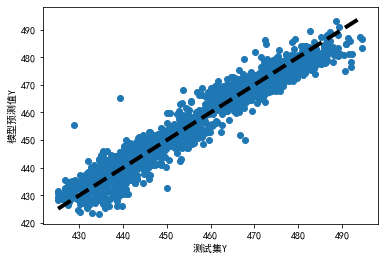

In [10]:
import matplotlib.pyplot as plt
#fig, ax = plt.subplots()
fig = plt.figure()
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
ax = fig.add_subplot(1,1,1)
ax.scatter(Y_test, Y_test_predict)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=4) #k--黑色虚线，lw代表粗细程度
ax.set_xlabel('测试集Y')
ax.set_ylabel('模型预测值Y')
plt.show()


对于输出y来说，真实值和预测值都是一维的，同时，真实值和预测值一一对应，它们之间的差值越小，预测越准确。显然，如果预测值=真实值，那么它们的差值最小，即上图中的黑色虚线。横坐标是真实值，纵坐标是预测值，那么对于所有的真实值，预测值离着黑线越近，预测越准确。